***
# `Project:` Prevendo a <font color='blue'>morte</font> ou <font color='blue'>vida</font> de pacientes com hepatite

## `Date:` fevereiro, 2022

## `Data Scientist:` Walter Trevisan
***

# `Análise Exploratória(EDA)-Etapa 3`

Nesta etapa, vamos realizar a **`Análise Exploratória`** dos dados, utilizando o *dataframe* de treinamento que foi salvo no arquivo **`train_set.pkl`**.

Então, vamos realizar as seguintes atividades:

1. **Carregar** o *dataframe* de treinamento, salvo no arquivo **`train_set.pkl`**;

2. **Realizar** uma **análise bivariada** das variáveis **categóricas**;

3. **Realizar** uma **análise bivariada** das variáveis **numéricas**;

4. **Conclusões**

## <font color='blue'>Setup</font>

Primeiro, vamos carregar os **pacotes e funções** que serão utilizadas neste **notebook**.

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Importa função para verificarmos a versão da linguagem python:
from platform import python_version

# Importando o pacote NumPy:
import numpy as np
# Importando o pacote Pandas:
import pandas as pd
# Importando o pacote Scipy:
import scipy
# Importando função para fazer combinações de variáveis:
from itertools import combinations
# Função VIF para verificar a multicolinearidade:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importando pacotes para visualização de gráficos:
import matplotlib as mpl
import matplotlib.pyplot as plt
# Importa o pacote "seaborn" para criarmos gráficos estatísticos:
import seaborn as sns
%matplotlib inline

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Gráficos, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
ROOT_DIR = "."

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
OBJ_PATH = os.path.join(ROOT_DIR, "objects")
# Criando o diretório, se ele não existir:
os.makedirs(OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "objetos" (Data Frames) do Projeto:
DATA_PATH = os.path.join(ROOT_DIR, "data")
# Criando o diretório, se ele não existir:
os.makedirs(DATA_PATH, exist_ok=True)

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) do Projeto:
GRAPHICS_PATH = os.path.join(ROOT_DIR, "images", "graphics")
# Criando o diretório, se ele não existir:
os.makedirs(GRAPHICS_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
LIB_PATH = os.path.join(ROOT_DIR, "library")

# Adicionando o diretório "./library" ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "data_science_library.py":
import data_science_library as dslib

# Importando para este notebook, as classes e funções definidas no módulo "plot_library.py":
import plot_library as ptlib

# Importando para este notebook, as classes e funções definidas no módulo "project_library.py":
import project_library as pjlib

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
print("Versões dos pacotes usados neste jupyter notebook:")
print("Python      : {}".format(python_version()))
print("Numpy       : {}".format(np.__version__))
print("Pandas      : {}".format(pd.__version__))
print("Scipy       : {}".format(scipy.__version__))
print("Matplotlib  : {}".format(mpl.__version__))
print("Seaborn     : {}".format(sns.__version__))

Versões dos pacotes usados neste jupyter notebook:
Python      : 3.8.12
Numpy       : 1.19.5
Pandas      : 1.3.5
Scipy       : 1.7.3
Matplotlib  : 3.4.3
Seaborn     : 0.11.2


## <font color='blue'>1- Carregar o *data frame* de treinamento: `train_set.pkl`</font>

In [3]:
# Carregando o objeto (data frame) no arquivo "train_set.pkl":
data_df = dslib.pickle_object_load(
    path=DATA_PATH, file="train_set.pkl",
    msg="O arquivo 'train_set.pkl' (data frame) foi carregado com sucesso!"
)

O arquivo 'train_set.pkl' (data frame) foi carregado com sucesso!


## <font color='blue'>2- Análise bivariada das variáveis `categóricas`</font>

Vamos analisar cada variável categórica *preditora* com a variável *target* (`Class`).

In [4]:
# Selecionando todas as variáveis categóricas:
var = (data_df.dtypes == 'object')
var_cat = list(var[var == True].index)
# Remove a variável target:
var_cat.remove('Class')
print('Qtde variáveis categóricas: {}'.format(len(var_cat)))

Qtde variáveis categóricas: 13


In [5]:
# Criando um dicionário para definir as categorias:
cats_dict = {
    'Gender':         ['female', 'male'],
    'Steroid':        ['no', 'yes'],
    'Antivirals':     ['no', 'yes'],
    'Fatigue':        ['no', 'yes'],
    'Malaise':        ['no', 'yes'],
    'Anorexia':       ['no', 'yes'],
    'LiverBig':       ['no', 'yes'],
    'LiverFirm':      ['no', 'yes'],
    'SpleenPalpable': ['no', 'yes'],
    'Spiders':        ['no', 'yes'],
    'Ascites':        ['no', 'yes'],
    'Varices':        ['no', 'yes'],
    'Histology':      ['no', 'yes']
}
# Converte para "categorical":
data_df = dslib.conv_object_to_categorical(data=data_df, variables=var_cat, categories=cats_dict)

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Class           123 non-null    object  
 1   Gender          123 non-null    category
 2   Steroid         123 non-null    category
 3   Antivirals      123 non-null    category
 4   Fatigue         123 non-null    category
 5   Malaise         123 non-null    category
 6   Anorexia        123 non-null    category
 7   LiverBig        123 non-null    category
 8   LiverFirm       123 non-null    category
 9   SpleenPalpable  123 non-null    category
 10  Spiders         123 non-null    category
 11  Ascites         123 non-null    category
 12  Varices         123 non-null    category
 13  Histology       123 non-null    category
 14  Age             123 non-null    float64 
 15  Bilirubin       123 non-null    float64 
 16  AlkPhosphate    123 non-null    float64 
 17  SGOT            

### Analisando a proporção (%) dos dados em cada variável de acordo com a variável *target* (`Class`)

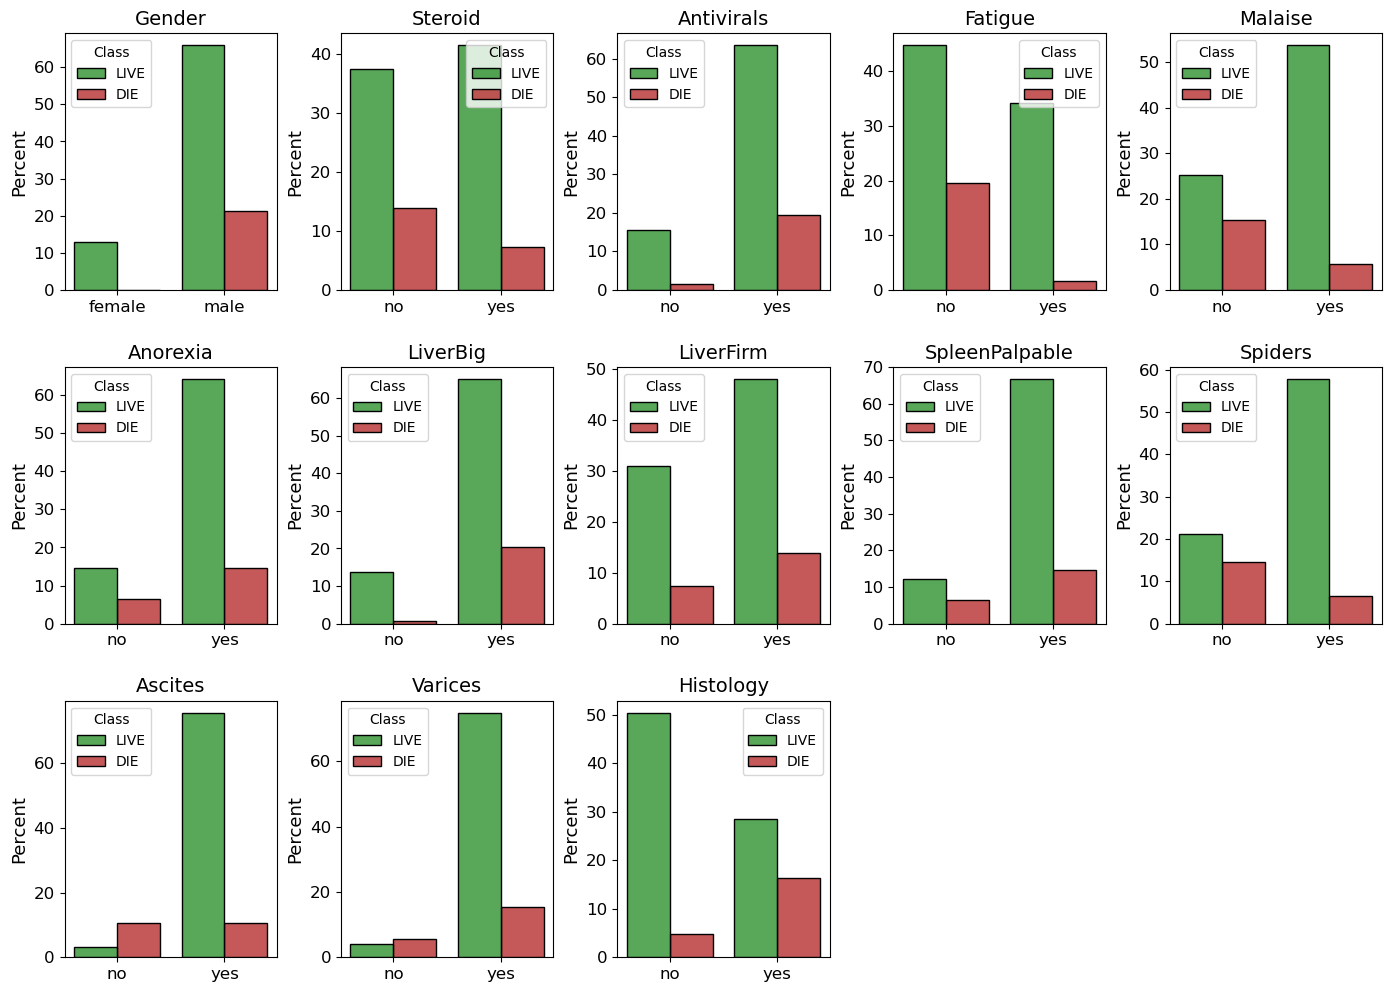

In [7]:
# Histogramas: variáveis x target.
ptlib.plot_histograms(
    data=data_df, x=var_cat, y=None, hue='Class', stat='percent', multiple='dodge', shrink=0.8, color=None,
    palette={'LIVE':'forestgreen', 'DIE':'firebrick'}, hue_order=['LIVE', 'DIE'], legend=True, plot_style=None,
    titles=var_cat, titles_fontsize=14, ylabels='Percent', ylabels_fontsize=13, xtick_labelsize=12, ytick_labelsize=12,
    cols_nr=5, rows_nr=3, width=17, height=12, wspace=0.3, hspace=0.3
)

**Análise:**
>* todas as mulheres **com hepatite** sobreviveram (**`LIVE`**);
>* a maioria dos homens que **morreram (`DIE`)**, **não utilizaram** algum tipo de **esteróide**; **utilizaram** algum tipo de **antiviral**; **não apresentaram** sinais de **fadiga**; **não apresentaram** sinais de **mal-estar**; **possuiam anorexia**; **estavam** com o **fígado aumentado**; **estavam** com o **baço aumentado**; **não estavam** com **manchas de aranha no corpo**; **possuiam varizes**; e **tinham realizado** o diagnóstico de doenças a partir de estudos comparativos entre tecidos saudáveis e doentes (**histologia**);
>* com relação a **estar** (ou **não estar**) com **ascite**, praticamente a mesma proporção de homens **morreram (`DIE`)**; 
>* a maioria dos pacientes que **sobreviveram (`LIVE`)**, **utilizaram** algum tipo de **antiviral**; **apresentaram** sinais de **mal-estar**; **possuiam anorexia**; **estavam** com o **fígado aumentado**; **estavam** com o **baço aumentado**; **estavam** com **manchas de aranha no corpo**; **estavam** com **ascite**; **possuiam varizes**; e **não tinham realizado** o diagnóstico de doenças a partir de estudos comparativos entre tecidos saudáveis e doentes (**histologia**);
>* com relação a **ter** (ou **não ter**) utilizado algum tipo de **esteróide**, e **estar** (ou **não estar**) com **sinais de fadiga**, praticamente a mesma proporção de homens sobreviveram (**`LIVE`**).

### Teste estatístico para analisar as `relações` entre as variáveis `categóricas` e a variável *target* (`Class`).

Vamos realizar um teste estatístico chamado **`Chi-Square`** (**Qui-Quadrado**) para verificarmos se existe (ou não) uma relação de dependência entre cada **variável categória preditora** e a variável *target* `Class`.

In [8]:
# Loop para realizar os testes de cada variável preditora vs variável target:
for var in var_cat:
    dslib.chi_square_test(data=data_df, var1=var, var2='Class', threshold=0.0)
    print()

Chi-Square Test: 'Gender' vs 'Class'
Attention: 25.0% of the cells have expected frequencies 'less than 5' in the contingency table!

Chi-Square Test: 'Steroid' vs 'Class'
chisquare-score is: 1.977569530984479  and p-value is: 0.15964668593743653
Failed to reject the null hypothesis. Variables are independent.

Chi-Square Test: 'Antivirals' vs 'Class'
Attention: 25.0% of the cells have expected frequencies 'less than 5' in the contingency table!

Chi-Square Test: 'Fatigue' vs 'Class'
chisquare-score is: 9.817754137582373  and p-value is: 0.0017283526335891246
Null Hypothesis is rejected. Variables are not independent.

Chi-Square Test: 'Malaise' vs 'Class'
chisquare-score is: 12.715156567412253  and p-value is: 0.00036270392353327234
Null Hypothesis is rejected. Variables are not independent.

Chi-Square Test: 'Anorexia' vs 'Class'
chisquare-score is: 1.17502956536012  and p-value is: 0.2783702051300462
Failed to reject the null hypothesis. Variables are independent.

Chi-Square Test: 

**Análise:**
* com 95% de confiança, temos evidências que as variáveis `Fatigue`, `Malaise`, `Spiders` e `Histology` possuem uma relação de dependência com a variável *target* `Class`, ou seja, estas variáveis poderão ser boas preditoras para classificarmos se um paciente com hepatite vai *morrer* (`DIE`) ou *sobreviver* (`LIVE`);

* com 95% de confiança, temos evidências que as variáveis `Steroid`, `Anorexia` e `LiverFirm` não possuem uma relação de dependência com a variável *target* `Class`, ou seja, estas variáveis provavelmente não serão boas preditoras para classificarmos se um paciente com hepatite vai *morrer* (`DIE`) ou *sobreviver* (`LIVE`);

* observamos ainda que não foi possível realizarmos o teste do *Chi-Square* para 6 variáveis: `Gender`, `Antivirals`, `LiverBig`, `SpleenPalpable`, `Ascites`, e `Varices`.

Agora, vamos realizar um outro teste estatístico chamado **`Fisher’s exact`** (**Fisher exato**) para verificarmos se existe (ou não) uma relação de dependência entre as **6 variáveis categóricas preditoras** (onde não conseguimos aplicar o teste do *Chi-Square*) e a variável *target* `Class`.

In [9]:
# Loop para realizar os testes de cada variável preditora vs variável target:
for var in ['Gender', 'Antivirals', 'LiverBig', 'SpleenPalpable', 'Ascites', 'Varices']:
    dslib.fisher_exact_test(data=data_df, var1=var, var2='Class')
    print()

Fisher’s exact test: 'Gender' vs 'Class'
p-value is: 0.022495995582641613
Null Hypothesis is rejected. Variables are not independent.

Fisher’s exact test: 'Antivirals' vs 'Class'
p-value is: 0.2398968333139503
Failed to reject the null hypothesis. Variables are independent.

Fisher’s exact test: 'LiverBig' vs 'Class'
p-value is: 0.11711538462436216
Failed to reject the null hypothesis. Variables are independent.

Fisher’s exact test: 'SpleenPalpable' vs 'Class'
p-value is: 0.0916585753476946
Failed to reject the null hypothesis. Variables are independent.

Fisher’s exact test: 'Ascites' vs 'Class'
p-value is: 1.2586643322608837e-07
Null Hypothesis is rejected. Variables are not independent.

Fisher’s exact test: 'Varices' vs 'Class'
p-value is: 0.0033574289939162934
Null Hypothesis is rejected. Variables are not independent.



**Análise:**
* com 95% de confiança, temos evidências que as variáveis `Gender`, `Ascites` e `Varices` têm uma relação de dependência com a variável *target* `Class`, ou seja, estas variáveis poderão ser boas preditoras para classificarmos se um paciente com hepatite vai *morrer* (`DIE`) ou *sobreviver* (`LIVE`);

* com 95% de confiança, temos evidências que as variáveis `Antivirals`, `LiverBig` e `SpleenPalpable` não têm uma relação de dependência com a variável *target* `Class`, ou seja, estas variáveis provavelmente não serão boas preditoras para classificarmos se um paciente com hepatite vai *morrer* (`DIE`) ou *sobreviver* (`LIVE`).

## <font color='blue'>3- Análise bivariada das variáveis `numéricas`</font>

In [10]:
# Selecionando as variáveis numéricas do "dataset":
var = (data_df.dtypes == 'float64')
var_num = list(var[var == True].index)
print('Qtde variáveis numéricas: {}'.format(len(var_num)))

Qtde variáveis numéricas: 6


### Analisando a `média` de cada variável numérica, de acordo com a variável *target* (`Class`)

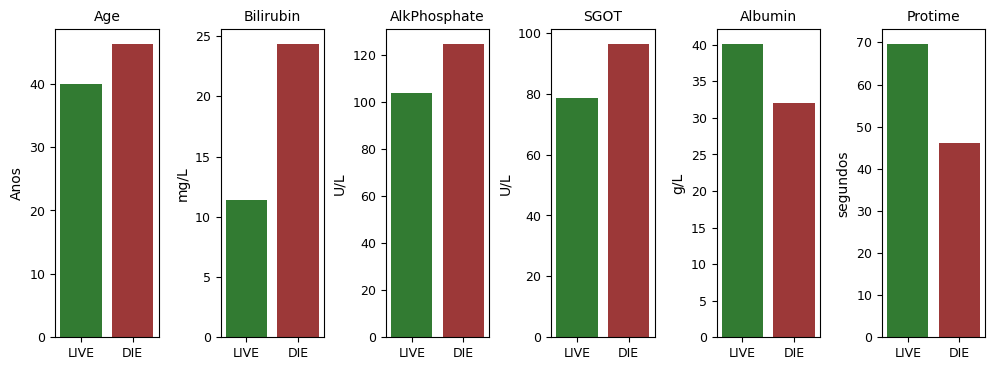

,Age,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime
Class,,,,,,
DIE,46.0,24.0,125.0,96.0,32.0,46.0
LIVE,40.0,11.0,104.0,78.0,40.0,70.0


In [11]:
# Criando uma lista com as unidades de medida:
units = ['Anos', 'mg/L', 'U/L', 'U/L', 'g/L', 'segundos']
# Gráficos de barra: variáveis x target.
ptlib.plot_barplots(
    x='Class', y=var_num, hue=None, data=data_df, order=['LIVE', 'DIE'], estimator=np.mean, ci=None, colors=None,
    palette={'LIVE':'forestgreen', 'DIE':'firebrick'}, saturation=0.70, plot_style=None, titles=var_num,
    titles_fontsize=10, xlabels=None, xlabels_fontsize=10, ylabels=units, ylabels_fontsize=10,
    xtick_labelsize=9, ytick_labelsize=9,cols_nr=6, rows_nr=1, width=12, height=4, wspace=0.6, hspace=None
)
# Mostrando os valores das medianas:
np.round(data_df.groupby(by='Class').mean(), decimals=0)

**Análise:**
>* os homens que **morreram (`DIE`)**, tinham em *média* **46 anos**; os seus exames de **Bilirrubina** apresentaram resultados com valores em *média* de **24 mg/L**; os seus exames de **Fosfatase Alcalina** apresentaram resultados com valores em *média* de **127 U/L**; os seus exames de **aspartato aminotransferase (SGOT)** apresentaram resultados com valores em *média* de **96 U/L**; os seus exames de **Albumina** apresentaram resultados com valores em *média* de **32 g/L**; os seus exames de **Tempo de Protrombina** apresentaram resultados com valores em *média* de **47 segundos**.
>* os pacientes que **sobreviveram (`LIVE`)**, tinham em *média* **40 anos**; os seus exames de **Bilirrubina** apresentaram resultados com valores em *média* de **11 mg/L**; os seus exames de **Fosfatase Alcalina** apresentaram resultados com valores em *média* de **104 U/L**; os seus exames de **aspartato aminotransferase (SGOT)** apresentaram resultados com valores em *média* de **78 U/L**; os seus exames de **Albumina** apresentaram resultados com valores em *média* de **40 g/L**; os seus exames de **Tempo de Protrombina** apresentaram resultados com valores em *média* de **70 segundos**.

### O que podemos afirmar sobre as *médias* das `idades` entre os pacientes que *morreram* e *sobreviveram*?

In [12]:
# Teste de hipóteses:
SEED = 42 # para termos reprodutibilidade com o parâmetro "permutations".
# Preparando os datasets por categoria:
set_die  = data_df.query("Class == 'DIE'" )['Age']
set_live = data_df.query("Class == 'LIVE'")['Age']
# Teste para analisar se as médias são "iguais":
dslib.t_test_independent(
    a=set_die, b=set_live, equal_var=False, permutations=10000, random_state=SEED, alternative='two-sided'
)
print() # pula 1 linha.

# Teste para analisar se as médias são "menores":
dslib.t_test_independent(
    a=set_die, b=set_live, equal_var=False, permutations=10000, random_state=SEED, alternative='less'
)
print() # pula 1 linha.

# Teste para analisar se as médias são "maiores":
dslib.t_test_independent(
    a=set_die, b=set_live, equal_var=False, permutations=10000, random_state=SEED, alternative='greater'
)

The calculated t-statistic is:2.588 and 'p-value' is:0.0154
Null Hypothesis is rejected. Averages of sets 'a' and 'b' are NOT EQUAL.

The calculated t-statistic is:2.588 and 'p-value' is:0.9934
Failed to reject the null hypothesis. Average of set 'b' is LESS than average of set 'a'.

The calculated t-statistic is:2.588 and 'p-value' is:0.0066
Null Hypothesis is rejected. Average of set 'b' is NOT GREATER than average of 'a'.


**Análise:** portanto, com **95%** de confiança, temos evidências para **afirmar** que a *média* de **idade** dos pacientes que *morreram* (`DIE`) é **maior** que a *média* dos pacientes que *sobreviveram* (`LIVE`).

### O que podemos afirmar sobre as *médias* nos `exames de Bilirrubina` entre os pacientes que *morreram* e *sobreviveram*?

In [13]:
# Teste de hipóteses:
SEED = 42 # para termos reprodutibilidade com o parâmetro "permutations".
# Preparando os datasets por categoria:
set_die  = data_df.query("Class == 'DIE'" )['Bilirubin']
set_live = data_df.query("Class == 'LIVE'")['Bilirubin']
# Teste para analisar se as médias são "iguais":
dslib.t_test_independent(
    a=set_die, b=set_live, equal_var=False, permutations=10000, random_state=SEED, alternative='two-sided'
)
print() # pula 1 linha.

# Teste para analisar se as médias são "menores":
dslib.t_test_independent(
    a=set_die, b=set_live, equal_var=False, permutations=10000, random_state=SEED, alternative='less'
)
print() # pula 1 linha.

# Teste para analisar se as médias são "maiores":
dslib.t_test_independent(
    a=set_die, b=set_live, equal_var=False, permutations=10000, random_state=SEED, alternative='greater'
)

The calculated t-statistic is:3.255 and 'p-value' is:0.0095
Null Hypothesis is rejected. Averages of sets 'a' and 'b' are NOT EQUAL.

The calculated t-statistic is:3.255 and 'p-value' is:1.0
Failed to reject the null hypothesis. Average of set 'b' is LESS than average of set 'a'.

The calculated t-statistic is:3.255 and 'p-value' is:0.0
Null Hypothesis is rejected. Average of set 'b' is NOT GREATER than average of 'a'.


**Análise:** portanto, com **95%** de confiança, temos evidências para **afirmar** que a *média* nos **exames de Bilirrubina** dos pacientes que *morreram* (`DIE`) é **maior** que a *média* dos pacientes que *sobreviveram* (`LIVE`).

### O que podemos afirmar sobre as *médias* nos `exames de Fosfatase Alcalina` entre os pacientes que *morreram* e *sobreviveram*?

In [14]:
# Teste de hipóteses:
SEED = 42 # para termos reprodutibilidade com o parâmetro "permutations".
# Preparando os datasets por categoria:
set_die  = data_df.query("Class == 'DIE'" )['AlkPhosphate']
set_live = data_df.query("Class == 'LIVE'")['AlkPhosphate']
# Teste para analisar se as médias são "iguais":
dslib.t_test_independent(
    a=set_die, b=set_live, equal_var=False, permutations=10000, random_state=SEED, alternative='two-sided'
)

The calculated t-statistic is:1.873 and 'p-value' is:0.0725
Failed to reject the null hypothesis. Averages of sets 'a' and 'b' are EQUAL.


**Análise:** portanto, com **95%** de confiança, temos evidências para **afirmar** que **não há uma diferença significativa** entre as *médias* nos **exames de Fosfatase Alcalina** dos pacientes que *morreram* (`DIE`) e dos pacientes que *sobreviveram* (`LIVE`).

### O que podemos afirmar sobre as *médias* nos `exames de aspartato aminotransferase (SGOT)` entre os pacientes que *morreram* e *sobreviveram*?

In [15]:
# Teste de hipóteses:
SEED = 42 # para termos reprodutibilidade com o parâmetro "permutations".
# Preparando os datasets por categoria:
set_die  = data_df.query("Class == 'DIE'" )['SGOT']
set_live = data_df.query("Class == 'LIVE'")['SGOT']
# Teste para analisar se as médias são "iguais":
dslib.t_test_independent(
    a=set_die, b=set_live, equal_var=False, permutations=10000, random_state=SEED, alternative='two-sided'
)

The calculated t-statistic is:0.828 and 'p-value' is:0.4341
Failed to reject the null hypothesis. Averages of sets 'a' and 'b' are EQUAL.


**Análise:** portanto, com **95%** de confiança, temos evidências para **afirmar** que **não há uma diferença significativa** entre as *médias* nos **exames de aspartato aminotransferase (SGOT)** dos pacientes que *morreram* (`DIE`) e dos pacientes que *sobreviveram* (`LIVE`).

### O que podemos afirmar sobre as *médias* nos `exames de Albumina` entre os pacientes que *morreram* e *sobreviveram*?

In [16]:
# Teste de hipóteses:
SEED = 42 # para termos reprodutibilidade com o parâmetro "permutations".
# Preparando os datasets por categoria:
set_die  = data_df.query("Class == 'DIE'" )['Albumin']
set_live = data_df.query("Class == 'LIVE'")['Albumin']
# Teste para analisar se as médias são "iguais":
dslib.t_test_independent(
    a=set_die, b=set_live, equal_var=False, permutations=10000, random_state=SEED, alternative='two-sided'
)
print() # pula 1 linha.

# Teste para analisar se as médias são "menores":
dslib.t_test_independent(
    a=set_die, b=set_live, equal_var=False, permutations=10000, random_state=SEED, alternative='less'
)
print() # pula 1 linha.

# Teste para analisar se as médias são "maiores":
dslib.t_test_independent(
    a=set_die, b=set_live, equal_var=False, permutations=10000, random_state=SEED, alternative='greater'
)

The calculated t-statistic is:-6.242 and 'p-value' is:0.0
Null Hypothesis is rejected. Averages of sets 'a' and 'b' are NOT EQUAL.

The calculated t-statistic is:-6.242 and 'p-value' is:0.0
Null Hypothesis is rejected. Average of set 'b' is NOT LESS than average of set 'a'.

The calculated t-statistic is:-6.242 and 'p-value' is:1.0
Failed to reject the null hypothesis. Average of set 'b' is GREATER than average of 'a'.


**Análise:** portanto, com **95%** de confiança, temos evidências para **afirmar** que a *média* nos **exames de Albumina** dos pacientes que *sobreviveram* (`LIVE`) é **maior** que a *média* dos pacientes que *morreram* (`DIE`).

### O que podemos afirmar sobre as *médias* nos `exames de Tempo de Protrombina` entre os pacientes que *morreram* e *sobreviveram*?

In [17]:
# Teste de hipóteses:
SEED = 42 # para termos reprodutibilidade com o parâmetro "permutations".
# Preparando os datasets por categoria:
set_die  = data_df.query("Class == 'DIE'" )['Protime']
set_live = data_df.query("Class == 'LIVE'")['Protime']
# Teste para analisar se as médias são "iguais":
dslib.t_test_independent(
    a=set_die, b=set_live, equal_var=False, permutations=10000, random_state=SEED, alternative='two-sided'
)
print() # pula 1 linha.

# Teste para analisar se as médias são "menores":
dslib.t_test_independent(
    a=set_die, b=set_live, equal_var=False, permutations=10000, random_state=SEED, alternative='less'
)
print() # pula 1 linha.

# Teste para analisar se as médias são "maiores":
dslib.t_test_independent(
    a=set_die, b=set_live, equal_var=False, permutations=10000, random_state=SEED, alternative='greater'
)

The calculated t-statistic is:-5.836 and 'p-value' is:0.0
Null Hypothesis is rejected. Averages of sets 'a' and 'b' are NOT EQUAL.

The calculated t-statistic is:-5.836 and 'p-value' is:0.0
Null Hypothesis is rejected. Average of set 'b' is NOT LESS than average of set 'a'.

The calculated t-statistic is:-5.836 and 'p-value' is:1.0
Failed to reject the null hypothesis. Average of set 'b' is GREATER than average of 'a'.


**Análise:** portanto, com **95%** de confiança, temos evidências para **afirmar** que a *média* nos **exames de Tempo de Protrombina** dos pacientes que *sobreviveram* (`LIVE`) é **maior** que a *média* dos pacientes que *morreram* (`DIE`).

### Analisando a `distribuição` de cada variável numérica, de acordo com a variável *target* (`Class`)

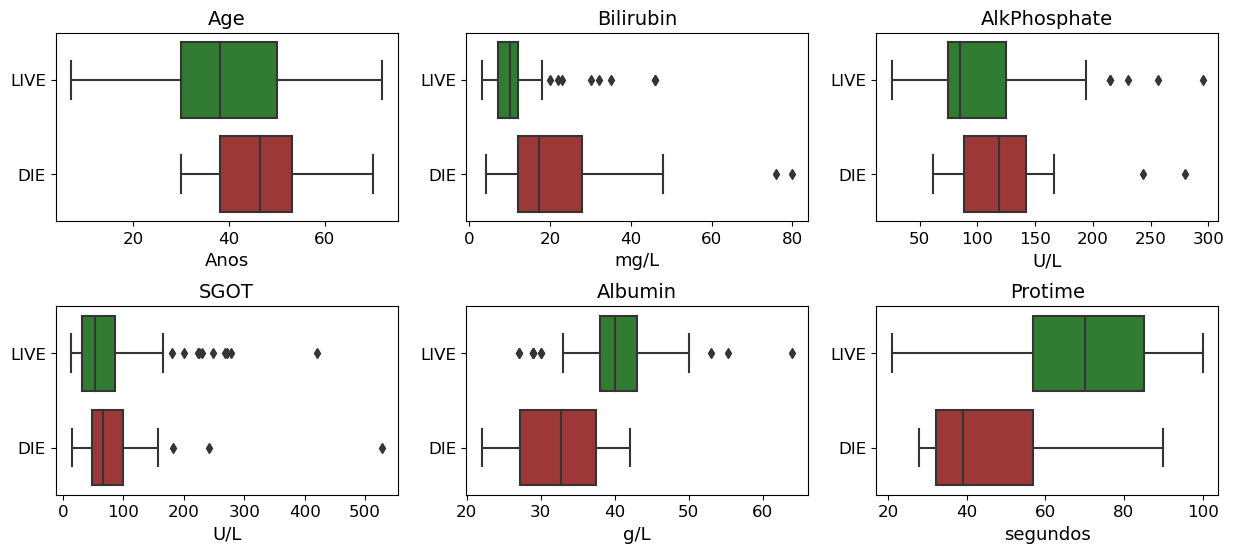

In [18]:
# Boxplots: variáveis x target.
ptlib.plot_boxplots(
    x=var_num, y='Class', hue=None, data=data_df, order=['LIVE', 'DIE'], hue_order=None, saturation=0.70,
    palette={'LIVE':'forestgreen', 'DIE':'firebrick'}, plot_style=None,
    titles=var_num, titles_fontsize=14, xlabels=units, xlabels_fontsize=13, xtick_labelsize=12,
    ytick_labelsize=12, cols_nr=3, rows_nr=2, width=15, height=6, wspace=None, hspace=0.45
)

**Análise:**
* os gráficos acima confirmam os testes esatísticos, ou seja, podemos **afimar**, com **95% de confiança** de que **existe uma diferença significativa** entre as *médias* dos pacientes que *morreram* (`DIE`) e dos pacientes que *sobreviveram* (`LIVE`) para as seguintes variáveis: **`Age`** (**idade**), **`Bilirubin`** (**Exame de Bilirrubina**), **`Albumin`** (**Exame de Albumina**) e **`Protime`** (**Exame de Tempo de Protrombina**). Portanto, estas variáveis **poderão ser boas preditoras** para classificarmos se um paciente com hepatite vai *morrer* (`DIE`) ou *sobreviver* (`LIVE`);

* da mesma forma, os gráficos acima confirmam os testes esatísticos, ou seja, podemos **afimar**, com **95% de confiança** de que **não existe uma diferença significativa** entre as *médias* dos pacientes que *morreram* (`DIE`) e dos pacientes que *sobreviveram* (`LIVE`) para as seguintes variáveis: **`AlkPhosphate`** (**Exame de Fosfatase Alcalina**) e **`SGOT`** (**Exame de Aspartato Aminotransferase**). Portanto, estas variáveis **não serão boas preditoras** para classificarmos se um paciente com hepatite vai *morrer* (`DIE`) ou *sobreviver* (`LIVE`).

In [19]:
# Mostrando o resumo estatístico:
np.round(data_df.groupby(by='Class').describe().transpose(), decimals=0)

Class                 DIE   LIVE
Age          count   26.0   97.0
             mean    46.0   40.0
             std     11.0   13.0
             min     30.0    7.0
             25%     38.0   30.0
             50%     46.0   38.0
             75%     53.0   50.0
             max     70.0   72.0
Bilirubin    count   26.0   97.0
             mean    24.0   11.0
             std     20.0    7.0
             min      4.0    3.0
             25%     12.0    7.0
             50%     17.0   10.0
             75%     28.0   12.0
             max     80.0   46.0
AlkPhosphate count   26.0   97.0
             mean   125.0  104.0
             std     51.0   49.0
             min     62.0   26.0
             25%     89.0   75.0
             50%    119.0   85.0
             75%    142.0  125.0
             max    280.0  295.0
SGOT         count   26.0   97.0
             mean    96.0   78.0
             std    103.0   73.0
             min     16.0   14.0
             25%     48.0   31.0
             50%     66.0   54.0
             75%    100.0   86.0
             max    528.0  420.0
Albumin      count   26.0   97.0
             mean    32.0   40.0
             std      6.0    6.0
             min     22.0   27.0
             25%     27.0   38.0
             50%     33.0   40.0
             75%     38.0   43.0
             max     42.0   64.0
Protime      count   26.0   97.0
             mean    46.0   70.0
             std     18.0   19.0
             min     28.0   21.0
             25%     32.0   57.0
             50%     39.0   70.0
             75%     57.0   85.0
             max     90.0  100.0

**Análise:**
>* **75%** dos homens que **morreram (`DIE`)**, tinham idades entre **30 e 56 anos**; os seus exames de **Bilirrubina** apresentaram resultados com valores entre **4 e 28 mg/L**; os seus exames de **Fosfatase Alcalina** apresentaram resultados com valores entre **62 e 144 U/L**; os seus exames de **aspartato aminotransferase (SGOT)** apresentaram resultados com valores entre **16 e 100 U/L**; os seus exames de **Albumina** apresentaram resultados com valores entre **22 e 37 g/L**; os seus exames de **Tempo de Protrombina** apresentaram resultados com valores entre **28 e 59 segundos**.
>* **75%** dos homens que **sobreviveram (`LIVE`)**, tinham idades entre **7 e 50 anos**; os seus exames de **Bilirrubina** apresentaram resultados com valores entre **3 e 12 mg/L**; os seus exames de **Fosfatase Alcalina** apresentaram resultados com valores entre **26 e 126 U/L**; os seus exames de **aspartato aminotransferase (SGOT)** apresentaram resultados com valores entre **14 e 86 U/L**; os seus exames de **Albumina** apresentaram resultados com valores entre **27 e 43 g/L**; os seus exames de **Tempo de Protrombina** apresentaram resultados com valores entre **21 e 85 segundos**.
>* podemos observar que os homens que **morreram (`DIE`)** possuem idades **a partir de 30 anos**; os seus exames de **Bilirrubina** e **Fosfatase Alcalina** apresentaram resultados com valores em **média** (**24 mg/L** e **127 U/L** respectivamente) **acima** dos valores apresentados pelos pacientes que **sobreviveram (`LIVE`)**; os seus exames de **aspartato aminotransferase (SGOT)** apresentaram resultados com valores em **média** (**96 U/L**) **muito próximo** dos valores apresentados pelos pacientes que **sobreviveram (`LIVE`)**; os seus exames de **Albumina** e **Tempo de Protrombina** apresentaram resultados com valores em **média** (**32 g/L** e **47 segundos** respectivamente) **abaixo** dos valores apresentados pelos pacientes que **sobreviveram (`LIVE`)**.

### Analisando a `correlação` entre as variáveis numéricas

In [20]:
# Criando uma lista de "tuplas" para definir as variáveis ([('x1','y1'),('x2','y2'),...('xn','yn')]):
# Combinando as variáveis numéricas 2 a 2 sem repetição.
variables_xy = [xy for xy in combinations(var_num, 2)]
# Criando uma lista de "tuplas" para definir as unidades das variáveis ([('x1','y1'),('x2','y2'),...('xn','yn')]):
# Combinando as unidades das variáveis numéricas 2 a 2 sem repetição.
units_xy = [xy for xy in combinations(units, 2)]
# Calculando as correlações entre cada "par" de variáveis:
# Utilizamos o método "spearman" porque, ao contrário da correlação de Pearson, a correlação de Spearman não assume
# que os dois datasets (as duas variáveis) sejam normalmente distribuídos.
feats_corr = np.round(
    [data_df[list(xy)].corr(method='spearman').at[list(xy)[0],list(xy)[1]] for xy in variables_xy],
    decimals=3
)
# Definindo os títulos de cada gráfico:
titles = ["corr = " + str(corr) for corr in feats_corr]

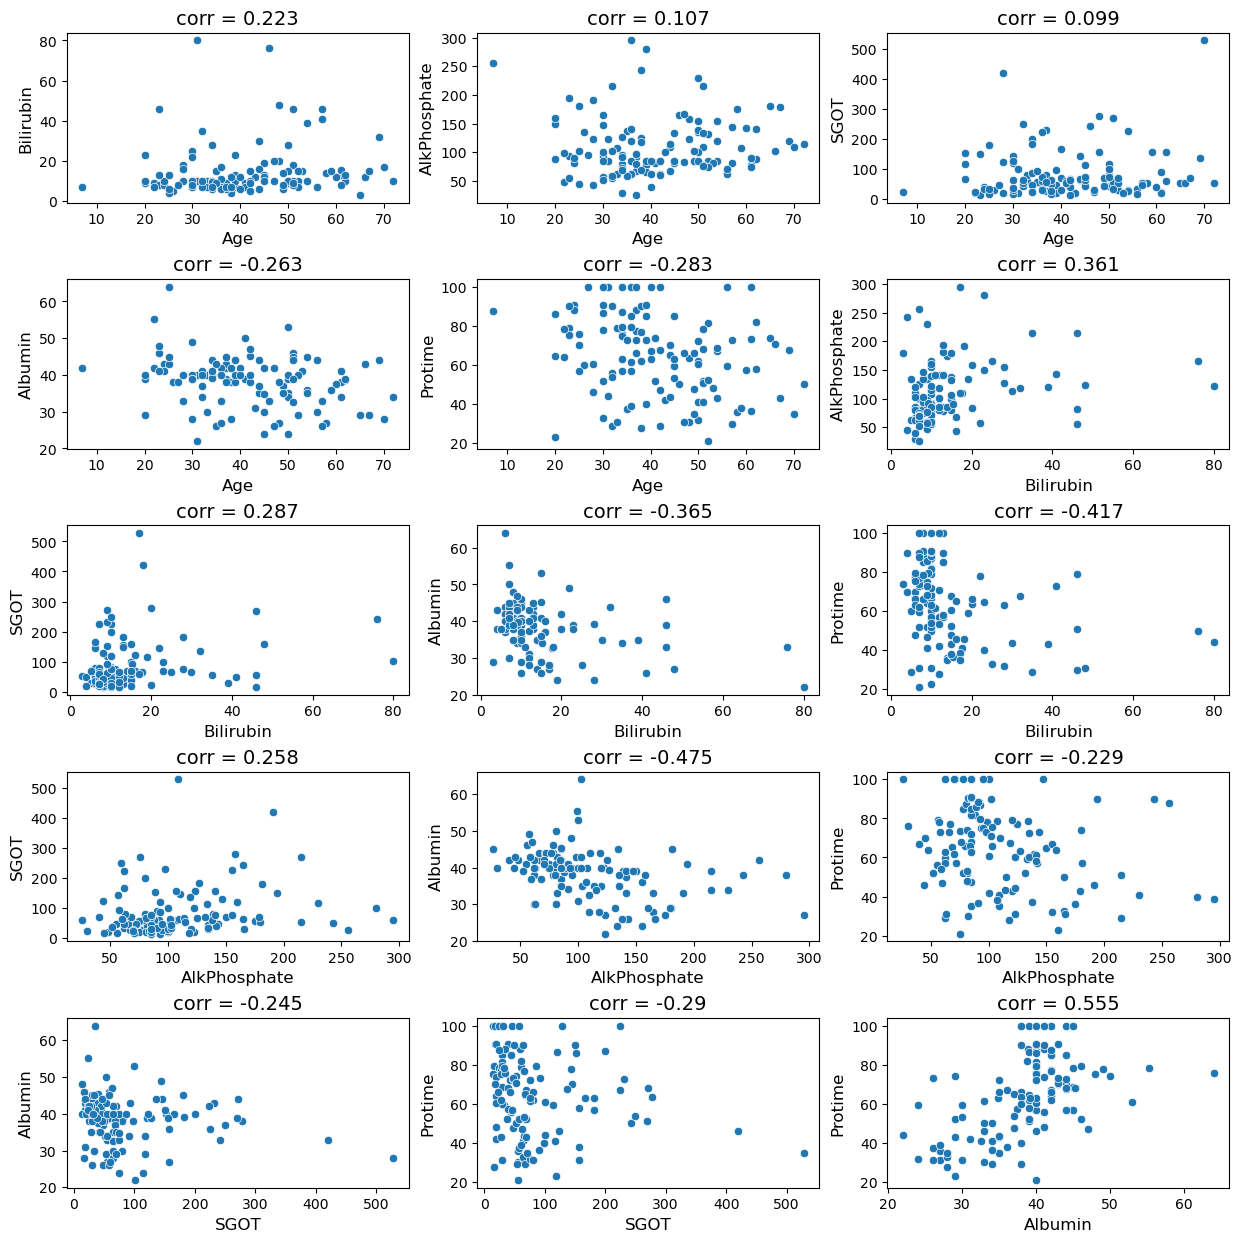

In [21]:
# Gráficos de dispersão:
ptlib.plot_scatterplots(
    features=variables_xy, hue=None, data=data_df, palette=None, hue_order=None, plot_style=None, titles=titles,
    titles_fontsize=14, xylabels=variables_xy, xlabels_fontsize=12, ylabels_fontsize=12, xtick_labelsize=10, ytick_labelsize=10,
    cols_nr=3, rows_nr=5, width=15, height=15, wspace=None, hspace=0.45
)

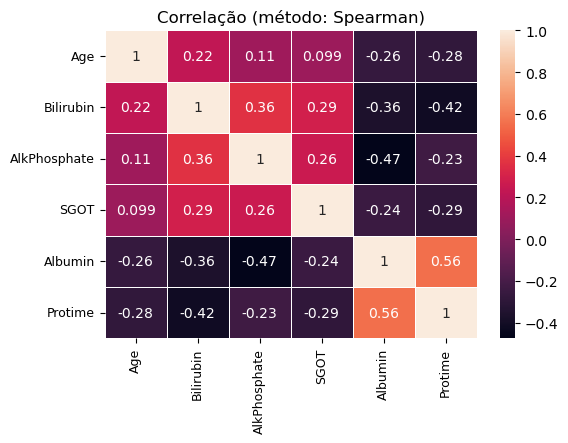

In [22]:
# Gráfico de correlação entre as variáveis:
ptlib.plot_corr_features(
    df=data_df, features=var_num, method='spearman', digits=3, title="Correlação (método: Spearman)", title_fontsize=12,
    xtick_labelsize=9, ytick_labelsize=9, width=6, height=4
)

**Análise:**
* As variáveis `Albumin x Protime` possuem uma **correlação positiva moderada**;

* As variáveis `Age x SGOT` e `Age x AlkPhosphate` **não estão correlacionadas**.

### Existe `correlação` entre as variáveis?

In [23]:
# APlicando o teste de correlação de "Spearman"
for xy in variables_xy:
    print("Spearman correlation test: '{}' and '{}'".format(xy[0], xy[1]))
    dslib.spearmanr_test(a=data_df[xy[0]], b=data_df[xy[1]], alternative='two-sided')
    print()

Spearman correlation test: 'Age' and 'Bilirubin'
Spearman correlation coefficient is:0.223 and 'p-value' is:0.01305880557080566
Null Hypothesis is rejected. Two sets of data are correlated.

Spearman correlation test: 'Age' and 'AlkPhosphate'
Spearman correlation coefficient is:0.107 and 'p-value' is:0.23698905737447998
Failed to reject the null hypothesis. Two sets of data are uncorrelated.

Spearman correlation test: 'Age' and 'SGOT'
Spearman correlation coefficient is:0.099 and 'p-value' is:0.2770638285724091
Failed to reject the null hypothesis. Two sets of data are uncorrelated.

Spearman correlation test: 'Age' and 'Albumin'
Spearman correlation coefficient is:-0.263 and 'p-value' is:0.003254720975210265
Null Hypothesis is rejected. Two sets of data are correlated.

Spearman correlation test: 'Age' and 'Protime'
Spearman correlation coefficient is:-0.283 and 'p-value' is:0.0015422210325969248
Null Hypothesis is rejected. Two sets of data are correlated.

Spearman correlation test

**Análise:**
* com **95%** de confiança, temos evidências que as variáveis `Age x AlkPhosphate` e `Age X SGOT` **não estão correlacionadas**;

* com **95%** de confiança, temos evidências que as demais de variáveis (*pares*) **estão correlacionadas**.

### Existe `correlação positiva` ou `correlação negativa` entre as variáveis?

In [24]:
# APlicando o teste de correlação de "Spearman"
for i, xy in enumerate(variables_xy):
    # Define a hipótese alternativa (H1):
    if(feats_corr[i] < 0):
        H1 = 'less'
    else:
        H1 = 'greater'
    
    # Aplica o teste: 
    print("Spearman correlation test: '{}' and '{}'".format(xy[0], xy[1]))
    dslib.spearmanr_test(a=data_df[xy[0]], b=data_df[xy[1]], alternative=H1)
    print()

Spearman correlation test: 'Age' and 'Bilirubin'
Spearman correlation coefficient is:0.223 and 'p-value' is:0.00652940278540283
Null Hypothesis is rejected. Correlation between the two data sets is positive (greater than zero).

Spearman correlation test: 'Age' and 'AlkPhosphate'
Spearman correlation coefficient is:0.107 and 'p-value' is:0.11849452868723999
Failed to reject the null hypothesis. Correlation between the two data sets is not positive (greater than zero).

Spearman correlation test: 'Age' and 'SGOT'
Spearman correlation coefficient is:0.099 and 'p-value' is:0.13853191428620454
Failed to reject the null hypothesis. Correlation between the two data sets is not positive (greater than zero).

Spearman correlation test: 'Age' and 'Albumin'
Spearman correlation coefficient is:-0.263 and 'p-value' is:0.0016273604876051325
Null Hypothesis is rejected. Correlation between the two data sets is negative (less than zero).

Spearman correlation test: 'Age' and 'Protime'
Spearman correl

**Análise:**
* com **95%** de confiança, temos evidências que as variáveis `Age e Bilirubin`, `Bilirubin e AlkPhosphate`, `Bilirubin e SGOT`, `AlkPhosphate e SGOT`, e `Albumin e Protime` **possuem uma correlação positiva**;

* com **95%** de confiança, temos evidências que as variáveis `Age e Albumin`, `Age e Protime`, `Bilirubin e Albumin`, `Bilirubin e Protime`, `AlkPhosphate e Albumin`, `AlkPhosphate e Protime`, `SGOT e Albumin` e `SGOT e Protime` **possuem uma correlação negativa**;

### Analisando a `correlação` entre as variáveis numéricas, de acordo com a variável *target* (`Class`)

In [25]:
# Calculando a correlação entre as variáveis de acordo com a variável target 'Class':
# Criando a lista para armazenar as correlações em tuplas:
feats_corr_by_target = []
for variables in variables_xy:
    feats = [variables[0], variables[1], 'Class']
    # Calcula as correlações, armazenando os resultados em uma tupla:
    # Utilizamos o método "spearman" porque, ao contrário da correlação de Pearson, a correlação de Spearman não assume
    # que os dois datasets (as duas variáveis) sejam normalmente distribuídos.
    corr_df = data_df[feats].groupby(by='Class').corr(method='pearson')
    corr_values = (np.round(corr_df.loc['DIE',:].at[variables[0], variables[1]],  decimals=3),
                   np.round(corr_df.loc['LIVE',:].at[variables[0], variables[1]], decimals=3))
    # Salva os valores calculados:
    feats_corr_by_target.append(corr_values)
    
# Definindo os títulos de cada gráfico:
titles = ["corr(DIE=" + str(corr_values[0]) + ", LIVE=" + str(corr_values[1]) + ")" for corr_values in feats_corr_by_target]

# Nota: neste caso, não podemos calcular a correlação de "Spearman", porque as 2 variáveis precisam ter o
# mesmo tamanho (len) dos dados. Então, optamos em calcular a correlação de "Pearson". 

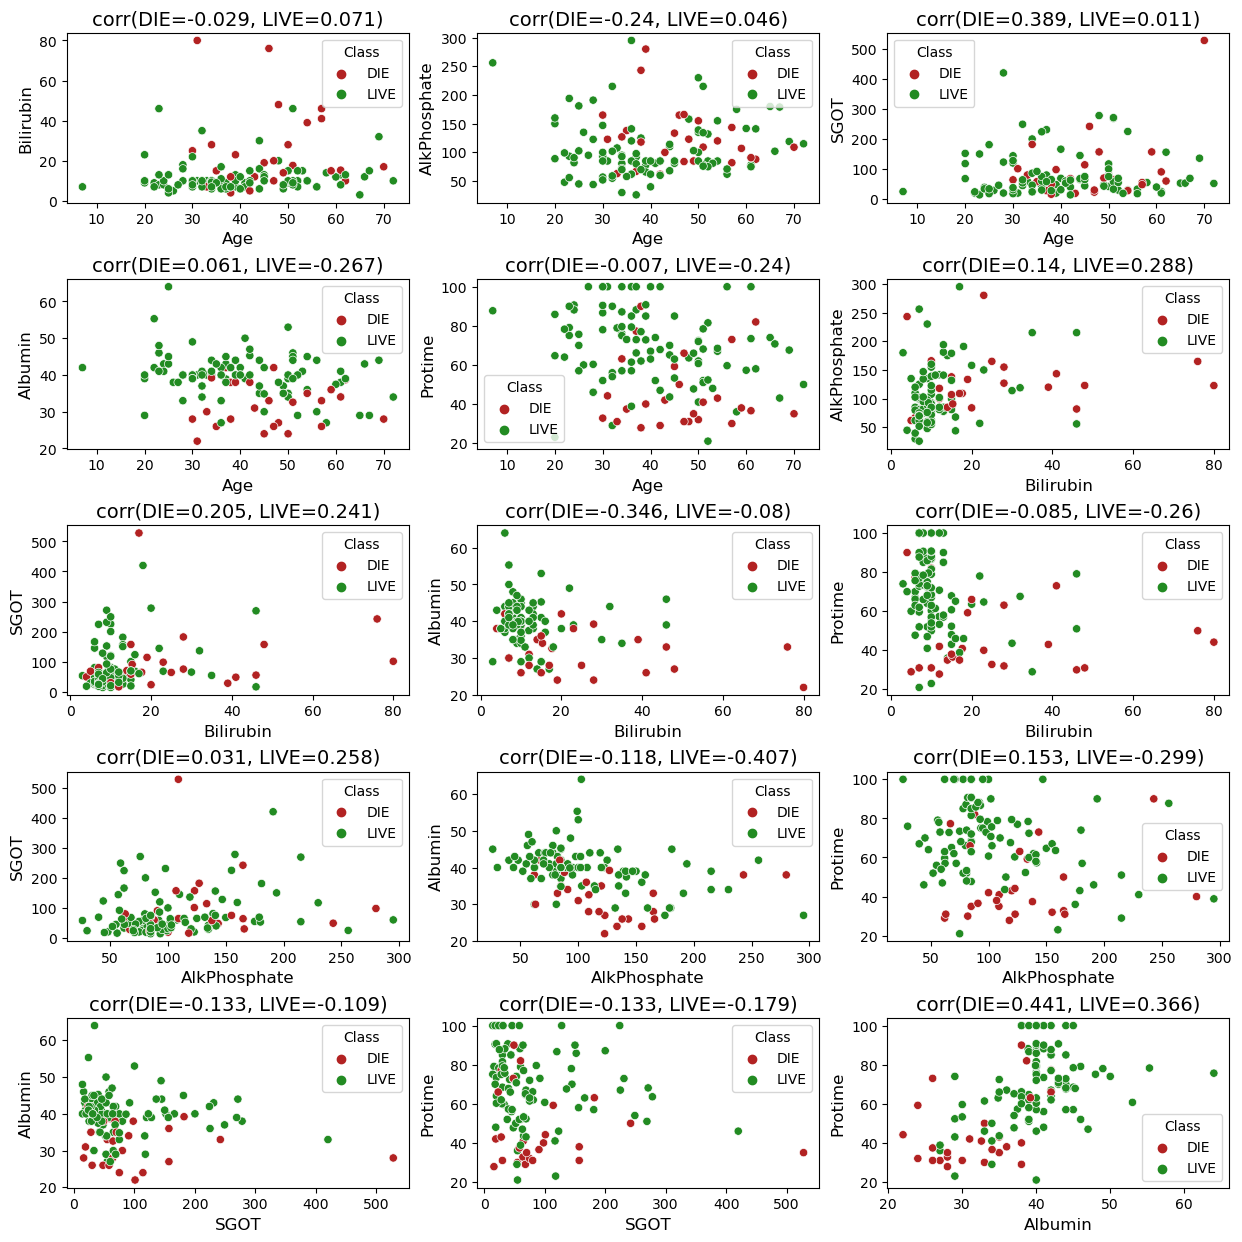

In [26]:
# Gráficos de dispersão:
ptlib.plot_scatterplots(
    features=variables_xy, hue='Class', data=data_df, palette={'LIVE':'forestgreen', 'DIE':'firebrick'}, hue_order=None,
    plot_style=None, titles=titles, titles_fontsize=14, xylabels=variables_xy, xlabels_fontsize=12,
    ylabels_fontsize=12, xtick_labelsize=10, ytick_labelsize=10, cols_nr=3, rows_nr=5, width=15, height=15,
    wspace=None, hspace=0.45
)

### Existe `correlação` entre as variáveis?

In [27]:
# APlicando o teste de correlação de "Pearson"
for xy in variables_xy:
    # Query para selecionar as observações por classe da variável "target":
    # Class = DIE:
    xy_0 = data_df.query("Class == 'DIE'")[xy[0]]
    xy_1 = data_df.query("Class == 'DIE'")[xy[1]]
    
    # Aplica o teste:
    print("Pearson correlation test for class DIE('{}' and '{}')".format(xy[0], xy[1]))
    dslib.pearsonr_test(x=xy_0, y=xy_1)
    print()
    
    # Class = LIVE:
    xy_0 = data_df.query("Class == 'LIVE'")[xy[0]]
    xy_1 = data_df.query("Class == 'LIVE'")[xy[1]]
    
    # Aplica o teste:
    print("Pearson correlation test for class LIVE('{}' and '{}')".format(xy[0], xy[1]))
    dslib.pearsonr_test(x=xy_0, y=xy_1)
    print()

Pearson correlation test for class DIE('Age' and 'Bilirubin')
Pearson correlation coefficient is:-0.029 and 'p-value' is:0.8899946984796487
Failed to reject the null hypothesis. Two sets of data are uncorrelated.

Pearson correlation test for class LIVE('Age' and 'Bilirubin')
Pearson correlation coefficient is:0.071 and 'p-value' is:0.49208858354704227
Failed to reject the null hypothesis. Two sets of data are uncorrelated.

Pearson correlation test for class DIE('Age' and 'AlkPhosphate')
Pearson correlation coefficient is:-0.24 and 'p-value' is:0.238554761912851
Failed to reject the null hypothesis. Two sets of data are uncorrelated.

Pearson correlation test for class LIVE('Age' and 'AlkPhosphate')
Pearson correlation coefficient is:0.046 and 'p-value' is:0.6562190590062714
Failed to reject the null hypothesis. Two sets of data are uncorrelated.

Pearson correlation test for class DIE('Age' and 'SGOT')
Pearson correlation coefficient is:0.389 and 'p-value' is:0.049717168894566136
Nul

**Análise:**

1. Para os pacientes que *morreram* (`DIE`):
>* com **95%** de confiança, temos evidências que todas as variáveis (*pares*) **não estão correlacionadas**.

2. Para os pacientes que *sobreviveram* (`LIVE`):
>* com **95%** de confiança, temos evidências que as variáveis `Age e Albumin`, `Age e Protime`, `Bilirubin e AlkPhosphate`, `Bilirubin e SGOT`, `Bilirubin e Protime`, `AlkPhosphate e SGOT`, `AlkPhosphate e Albumin`, `AlkPhosphate e Protime` e `Albumin e Protime` **estão correlacionadas**;
>* com **95%** de confiança, temos evidências que as demais de variáveis (*pares*) **não estão correlacionadas**.

### Existe `correlação positiva` ou `correlação negativa` entre as variáveis?

De acordo com os testes de correlação (**Pearson**) temos:

1. Para os pacientes que *morreram* (`DIE`):
>* com **95%** de confiança, temos evidências que todas as variáveis (*pares*) *não estão correlacionadas*, ou seja, **não possuem correlação positiva e negativa**.

2. Para os pacientes que *sobreviveram* (`LIVE`):
>* com **95%** de confiança, temos evidências que as variáveis `Bilirubin e AlkPhosphate`, `Bilirubin e SGOT`, `AlkPhosphate e SGOT`, e `Albumin e Protime` **possuem uma correlação positiva**;
>* com **95%** de confiança, temos evidências que as variáveis `Age e Albumin`, `Age e Protime`, `Bilirubin e Protime`, `AlkPhosphate e Albumin` e `AlkPhosphate e Protime` **possuem uma correlação negativa**.

In [28]:
# APlicando o teste de correlação de "Spearman"
for i, xy in enumerate(variables_xy):
    # Query para selecionar as observações por classe da variável "target":
    # Class = DIE:
    xy_0 = data_df.query("Class == 'DIE'")[xy[0]]
    xy_1 = data_df.query("Class == 'DIE'")[xy[1]]
    # Define a hipótese alternativa (H1):
    if(feats_corr_by_target[i][0] < 0):
        H1 = 'less'
    else:
        h1 = 'greater'
    
    # Aplica o teste:
    print("Spearman correlation test for class DIE('{}' and '{}')".format(xy[0], xy[1]))
    dslib.spearmanr_test(a=xy_0, b=xy_1, alternative=H1)
    print()
    
    # Class = LIVE:
    xy_0 = data_df.query("Class == 'LIVE'")[xy[0]]
    xy_1 = data_df.query("Class == 'LIVE'")[xy[1]]
    # Define a hipótese alternativa (H1):
    if(feats_corr_by_target[i][1] < 0):
        H1 = 'less'
    else:
        h1 = 'greater'
    
    # Aplica o teste:
    print("Spearman correlation test for class LIVE('{}' and '{}')".format(xy[0], xy[1]))
    dslib.spearmanr_test(a=xy_0, b=xy_1, alternative='two-sided')
    print()
    
for i, xy in enumerate(variables_xy):
    if(feats_corr[i] < 0):
        H1 = 'less'
    else:
        H1 = 'greater'
    
    print("Spearman correlation test: '{}' and '{}'".format(xy[0], xy[1]))
    dslib.spearmanr_test(a=data_df[xy[0]], b=data_df[xy[1]], alternative=H1)
    print()

Spearman correlation test for class DIE('Age' and 'Bilirubin')
Spearman correlation coefficient is:0.119 and 'p-value' is:0.719465737158449
Failed to reject the null hypothesis. Correlation between the two data sets is not negative (less than zero).

Spearman correlation test for class LIVE('Age' and 'Bilirubin')
Spearman correlation coefficient is:0.143 and 'p-value' is:0.16141288677232674
Failed to reject the null hypothesis. Two sets of data are uncorrelated.

Spearman correlation test for class DIE('Age' and 'AlkPhosphate')
Spearman correlation coefficient is:-0.209 and 'p-value' is:0.15317270156646054
Failed to reject the null hypothesis. Correlation between the two data sets is not negative (less than zero).

Spearman correlation test for class LIVE('Age' and 'AlkPhosphate')
Spearman correlation coefficient is:0.073 and 'p-value' is:0.47685154354369896
Failed to reject the null hypothesis. Two sets of data are uncorrelated.

Spearman correlation test for class DIE('Age' and 'SGOT

Spearman correlation coefficient is:-0.229 and 'p-value' is:0.005407987395357376
Null Hypothesis is rejected. Correlation between the two data sets is negative (less than zero).

Spearman correlation test: 'SGOT' and 'Albumin'
Spearman correlation coefficient is:-0.245 and 'p-value' is:0.0031789383593114513
Null Hypothesis is rejected. Correlation between the two data sets is negative (less than zero).

Spearman correlation test: 'SGOT' and 'Protime'
Spearman correlation coefficient is:-0.29 and 'p-value' is:0.0005779366418083228
Null Hypothesis is rejected. Correlation between the two data sets is negative (less than zero).

Spearman correlation test: 'Albumin' and 'Protime'
Spearman correlation coefficient is:0.555 and 'p-value' is:1.3590681512222276e-11
Null Hypothesis is rejected. Correlation between the two data sets is positive (greater than zero).



**Análise:**
* com **95%** de confiança, temos evidências que as variáveis `Age e Bilirubin`, `Bilirubin e AlkPhosphate`, `Bilirubin e SGOT`, `AlkPhosphate e SGOT`, e `Albumin e Protime` **possuem uma correlação positiva**;

* com **95%** de confiança, temos evidências que as variáveis `Age e Albumin`, `Age e Protime`, `Bilirubin e Albumin`, `Bilirubin e Protime`, `AlkPhosphate e Albumin`, `AlkPhosphate e Protime`, `SGOT e Albumin` e `SGOT e Protime` **possuem uma correlação negativa**;

### Existe `multicolinearidade` entre as variáveis `numéricas`?

In [29]:
# Criando um dataframe para calularmos o VIF:
vif_data = pd.DataFrame()
# Coluna com os nomes das variáveis:
vif_data["feature"] = var_num
# Calculando os valores VIF:
vif_data["VIF"] = [variance_inflation_factor(data_df[var_num].values, i) for i in range(len(var_num))]
# Mostra os resultados:
vif_data

,feature,VIF
0,Age,8.959433
1,Bilirubin,2.628528
2,AlkPhosphate,5.421875
3,SGOT,2.260858
4,Albumin,24.782519
5,Protime,15.354928


**Análise:** os valores **VIF** para as variáveis `Albumin` e `Protime` estão elevados (acima do valor limite igual a 10), indicando que estas variáveis são **colineares**. Portanto, precisaremos tratar esta *colinearidade* quando utilizarmos modelos lineares na etapa de modelagem. 

## <font color='blue'>4- Conclusões</font>

Nesta etapa de **análise exploratória dos dados** realizamos a análise *bivariada* das variáveis categóricas e numéricas. Então, para cada tipo de variável concluímos que:
#### <font color='red'>**Variáveis Categóricas:**</font>
* com 95% de confiança, temos evidências significativas para afirmar que as variáveis `Fatigue`, `Malaise`, `Spiders`, `Histology`, `Gender`, `Ascites` e `Varices` possuem uma relação de dependência com a variável *target* `Class`, ou seja, estas variáveis poderão ser boas preditoras para classificarmos se um paciente com hepatite vai *morrer* (`DIE`) ou *sobreviver* (`LIVE`);

* todas as mulheres **com hepatite** sobreviveram (**`LIVE`**).

#### <font color='red'>**Variáveis Numéricas:**</font>
* podemos **afimar**, com **95% de confiança** de que **existe uma diferença significativa** entre as *médias* dos pacientes que *morreram* (`DIE`) e dos pacientes que *sobreviveram* (`LIVE`) para as seguintes variáveis: **`Age`** (**idade**), **`Bilirubin`** (**Exame de Bilirrubina**), **`Albumin`** (**Exame de Albumina**) e **`Protime`** (**Exame de Tempo de Protrombina**). Portanto, estas variáveis **poderão ser boas preditoras** para classificarmos se um paciente com hepatite vai *morrer* (`DIE`) ou *sobreviver* (`LIVE`);

* As variáveis `Albumin x Protime` possuem uma **correlação positiva moderada**;

* As variáveis `Age x SGOT` e `Age x AlkPhosphate` **não estão correlacionadas**;

* Detectamos **colinearidade** entre as variáveis `Albumin` e `Protime`.

## <font color='black'>FIM</font>